In [1]:
# Importing required libraries and packages

import pandas as pd
import numpy as np
import gzip
import ast
import re
from unidecode import unidecode
import matplotlib.pyplot as plt

In [2]:
def read_gz_file(file_paths):
    """
    Reads a list of files compressed in gzip format and returns a dictionary
    where the keys are the file names and the values are the contents
    decoded in UTF-8.
    Args:
        file_paths (list): List of paths to the gzip-compressed files.
    Returns:
        dict: A dictionary where keys are file names and values are the
              contents of the files decoded in UTF-8.
    """
    
    file_contents = {}
    for file_path in file_paths:
        with gzip.open(file_path, 'r') as file:
            file_content = file.read().decode('utf-8')
            # Get the file name without the extension and use it as a key in the dictionary
            file_name = file_path.split('.')[0]
            file_contents[file_name] = file_content
    return file_contents

In [3]:
file_paths = ['raw_data/steam_games.json.gz','raw_data/user_reviews.json.gz', 'raw_data/users_items.json.gz']

In [4]:
file_contents = read_gz_file(file_paths)

In [5]:
file_contents.keys()

dict_keys(['raw_data/steam_games', 'raw_data/user_reviews', 'raw_data/users_items'])

In [6]:
def clean_dictionaries_list(dictionary):
    """
    Cleans dictionaries in a list by performing certain replacement operations.
    Args:
        dictionary (dict): Dictionary to clean.
    Returns:
        list: List of cleaned dictionaries.
    """
    # Get the list of dictionaries from the given dictionary
    dictionaries_list = dictionary.strip().split('\n')
    
    # Remove '\r' from each string in the list
    cleaned_dictionaries_list = [s.strip('\r') for s in dictionaries_list]
    
    # Replace 'NaN' with 'None', 'true' with 'True', and 'false' with 'False' in each string
    list_without_nan = [string.replace('NaN', 'None') for string in cleaned_dictionaries_list]
    list_with_true = [string.replace('true', 'True') for string in list_without_nan]
    list_with_false = [string.replace('false', 'False') for string in list_with_true]
    
    # Return the list of cleaned dictionaries
    return list_with_false


In [7]:
steamGames = clean_dictionaries_list(file_contents['raw_data/steam_games'])
userReviews = clean_dictionaries_list(file_contents['raw_data/user_reviews'])
#usersItems = clean_dictionaries_list(file_contents['raw_data/users_items'])

In [8]:
print(type(steamGames))
print(type(userReviews))
#print(type(usersItems))

<class 'list'>
<class 'list'>


In [9]:
def create_dataframe_from_dictionaries(dictionaries_list):
    """
    Creates a DataFrame from a list of strings containing dictionaries.
    Args:
        dictionaries_list (list): List of strings containing dictionaries to process.
    Returns:
        pd.DataFrame: DataFrame constructed from the processed dictionaries.
    """
    # Initialize a list to store the evaluated dictionaries
    list_of_dictionaries = []
    
    # Iterate over the strings and evaluate each one as a Python expression using ast.literal_eval()
    for dictionary_str in dictionaries_list:
        dictionary = ast.literal_eval(dictionary_str)
        list_of_dictionaries.append(dictionary)

    # Convert the list of dictionaries into a DataFrame
    df = pd.DataFrame(list_of_dictionaries)
    
    # Return the DataFrame
    return df


In [10]:
# If you run the code once, it will take 4 mins.
df_steamGames = create_dataframe_from_dictionaries(steamGames)
df_userReviews = create_dataframe_from_dictionaries(userReviews)
#df_usersItems = create_dataframe_from_dictionaries(usersItems)

# STEAM GAMES

In [11]:
df_steamGames.head()

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,None,None,None,None,None,None,None,None,None,None,None,None,None
1,None,None,None,None,None,None,None,None,None,None,None,None,None
2,None,None,None,None,None,None,None,None,None,None,None,None,None
3,None,None,None,None,None,None,None,None,None,None,None,None,None
4,None,None,None,None,None,None,None,None,None,None,None,None,None


In [12]:
# Remove rows where all values are NaN in the DataFrame df_steamGames
df_steamGames.dropna(how='all', inplace=True)

# Drop specified columns ('url' and 'reviews_url') from the DataFrame df_steamGames
df_steamGames.drop(columns=['url', 'reviews_url'], inplace=True)

In [13]:
df_steamGames.head()

,publisher,genres,app_name,title,release_date,tags,specs,price,early_access,id,developer
88310,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",[Single-player],4.99,False,761140,Kotoshiro
88311,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...","[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,643980,Secret Level SRL
88312,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...","[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,670290,Poolians.com
88313,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,2017-12-07,"[Action, Adventure, Casual]",[Single-player],0.99,False,767400,彼岸领域
88314,None,None,Log Challenge,None,None,"[Action, Indie, Casual, Sports]","[Single-player, Full controller support, HTC V...",2.99,False,773570,None


In [14]:
def list_to_string(lst):
    """
    Converts a list to a comma-separated string.
    Args:
        lst (list): List to be converted to a string.
    Returns:
        str: Comma-separated string representation of the input list.
            Returns None if the input list is None.
    """
    if lst is None:
        return None
    return ','.join(map(str, lst)) #converts the list to strings

In [15]:
df_steamGames['tags'] = df_steamGames['tags'].apply(lambda x: list_to_string(x))
df_steamGames['genres'] = df_steamGames['genres'].apply(lambda x: list_to_string(x))
df_steamGames['specs'] = df_steamGames['specs'].apply(lambda x: list_to_string(x))

In [16]:
# Iterate over all columns of the DataFrame
for column in df_steamGames.columns:
    # Apply unidecode to remove special characters
    df_steamGames[column] = df_steamGames[column].apply(lambda x: unidecode(x) if isinstance(x, str) else x)
    # Remove other non-UTF-8 characters from the DataFrame
    df_steamGames[column] = df_steamGames[column].apply(lambda x: re.sub(r'[^\x00-\x7F]+', '', x) if isinstance(x, str) else x)


/opt/homebrew/lib/python3.11/site-packages/unidecode/__init__.py:121: RuntimeWarning: Surrogate character '\ud83c' will be ignored. You might be using a narrow Python build.
  repl = _get_repl_str(char)
/opt/homebrew/lib/python3.11/site-packages/unidecode/__init__.py:121: RuntimeWarning: Surrogate character '\udf55' will be ignored. You might be using a narrow Python build.
  repl = _get_repl_str(char)
/opt/homebrew/lib/python3.11/site-packages/unidecode/__init__.py:121: RuntimeWarning: Surrogate character '\ud83d' will be ignored. You might be using a narrow Python build.
  repl = _get_repl_str(char)
/opt/homebrew/lib/python3.11/site-packages/unidecode/__init__.py:121: RuntimeWarning: Surrogate character '\udd32' will be ignored. You might be using a narrow Python build.
  repl = _get_repl_str(char)
/opt/homebrew/lib/python3.11/site-packages/unidecode/__init__.py:121: RuntimeWarning: Surrogate character '\ude31' will be ignored. You might be using a narrow Python build.
  repl = _get_

In [17]:
# Variables to consider as requested
columns = ['id', 'app_name', 'title', 'genres', 'tags', 'release_date']
dfGames = df_steamGames[columns]

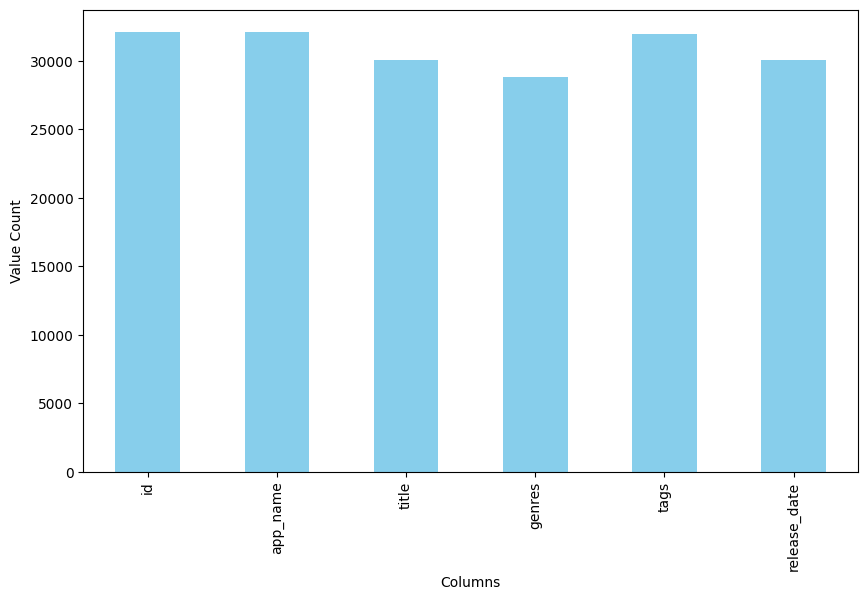

In [18]:
# Get the count of non-null values in each column of dfGames
value_counts = dfGames.count()
plt.figure(figsize=(10,6))
value_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Columns')
plt.ylabel('Value Count')
plt.show()

<Axes: >

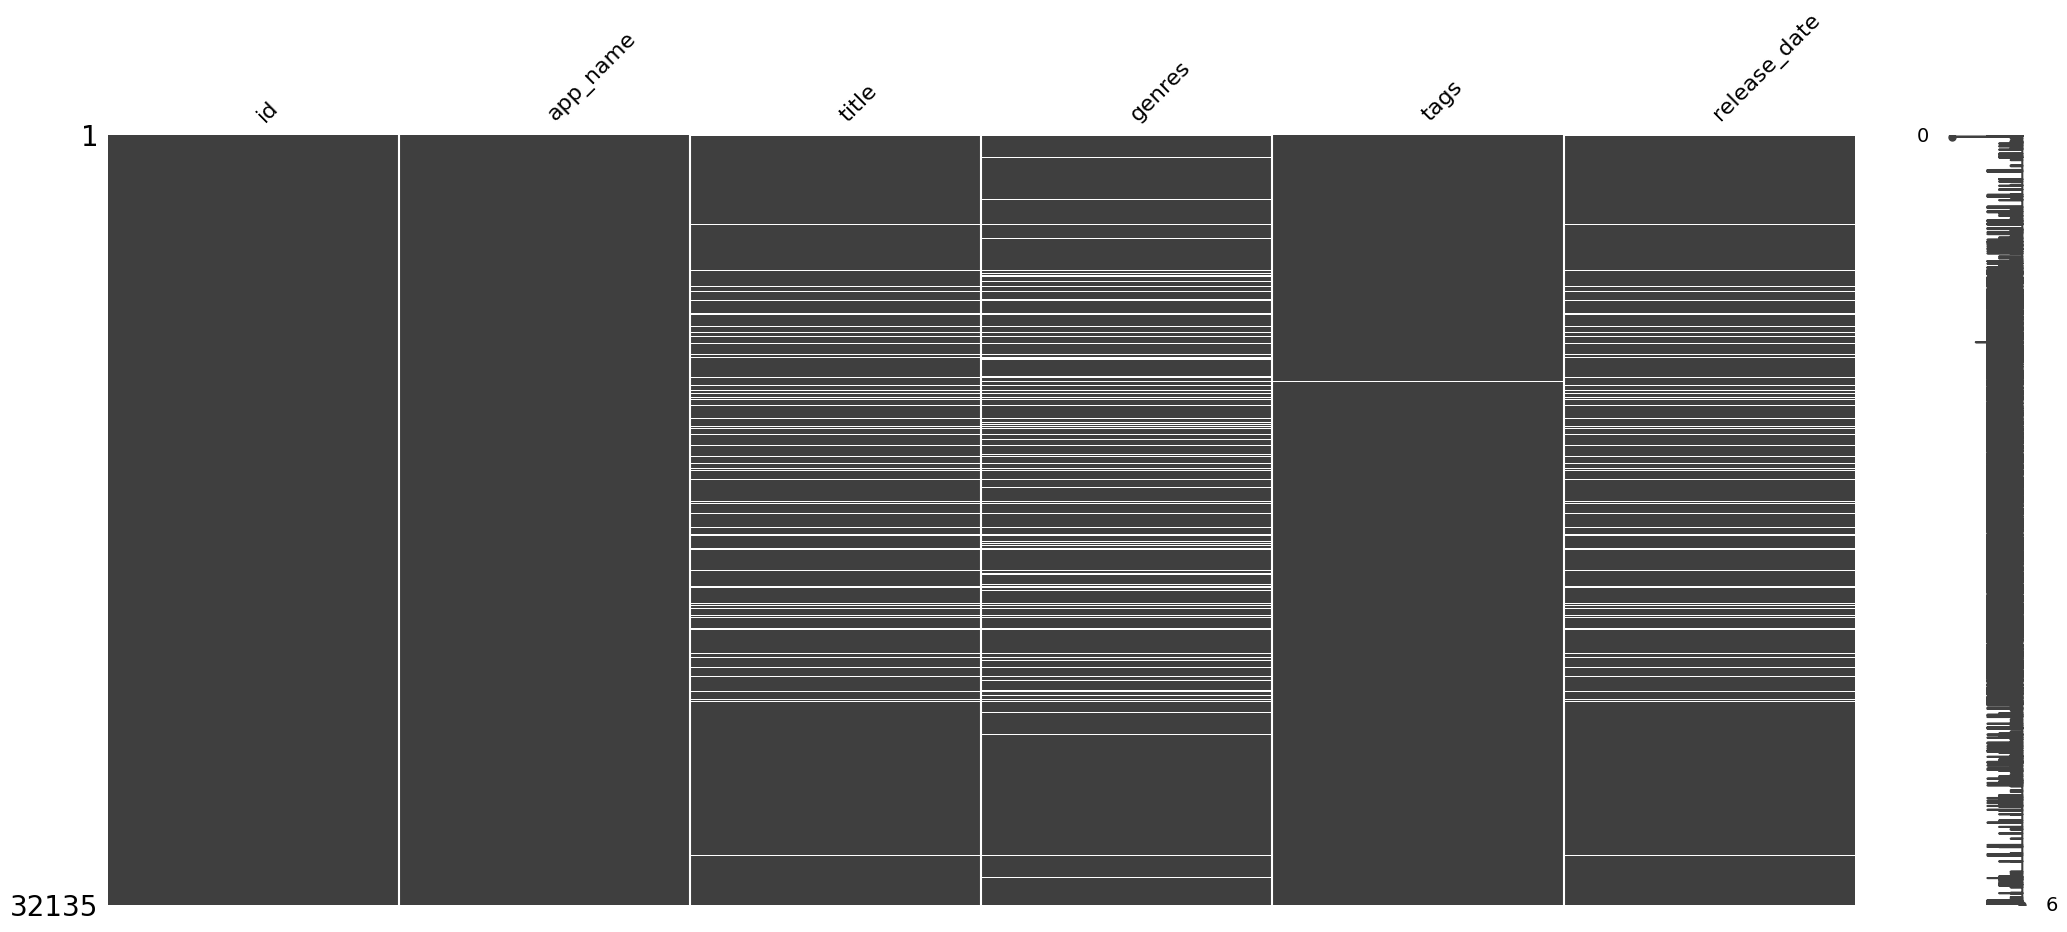

In [19]:
# Import the missingno library and visualize the missing values using a matrix plot
import missingno as msn
msn.matrix(dfGames)

In [20]:
dfGames

# Visualizamos columnas que tiene similar informacion 
# app_name similar a title 
# genres similar a tags

,id,app_name,title,genres,tags,release_date
88310,761140,Lost Summoner Kitty,Lost Summoner Kitty,"Action,Casual,Indie,Simulation,Strategy","Strategy,Action,Indie,Casual,Simulation",2018-01-04
88311,643980,Ironbound,Ironbound,"Free to Play,Indie,RPG,Strategy","Free to Play,Strategy,Indie,RPG,Card Game,Trad...",2018-01-04
88312,670290,Real Pool 3D - Poolians,Real Pool 3D - Poolians,"Casual,Free to Play,Indie,Simulation,Sports","Free to Play,Simulation,Sports,Casual,Indie,Mu...",2017-07-24
88313,767400,Dan Zha Ren 2222,Dan Zha Ren 2222,"Action,Adventure,Casual","Action,Adventure,Casual",2017-12-07
88314,773570,Log Challenge,None,None,"Action,Indie,Casual,Sports",None
...,...,...,...,...,...,...
120440,773640,Colony On Mars,Colony On Mars,"Casual,Indie,Simulation,Strategy","Strategy,Indie,Casual,Simulation",2018-01-04
120441,733530,LOGistICAL: South Africa,LOGistICAL: South Africa,"Casual,Indie,Strategy","Strategy,Indie,Casual",2018-01-04
120442,610660,Russian Roads,Russian Roads,"Indie,Racing,Simulation","Indie,Simulation,Racing",2018-01-04
120443,658870,EXIT 2 - Directions,EXIT 2 - Directions,"Casual,Indie","Indie,Casual,Puzzle,Singleplayer,Atmospheric,R...",2017-09-02


In [21]:
# We balance the columns

# Create a new column 'newAppName' and assign values from 'app_name'
dfGames.loc[:, 'newAppName'] = dfGames['app_name']

# Create a new column 'newGenres' and assign values from 'genres'
dfGames.loc[:, 'newGenres'] = dfGames['genres']

/var/folders/1y/p14x729x77z3ykk1y391m39c0000gn/T/ipykernel_56436/3042371858.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfGames.loc[:, 'newAppName'] = dfGames['app_name']
/var/folders/1y/p14x729x77z3ykk1y391m39c0000gn/T/ipykernel_56436/3042371858.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfGames.loc[:, 'newGenres'] = dfGames['genres']


In [22]:
# We define the following conditional function to update the created columns
def update_column(value1, value2):
    '''
    This function takes two arguments: value1 and value2.
    If the value in 'value1' is null and the value in 'value2' is not null,
    it returns the value of 'value2'. 
    Otherwise, it returns the value of 'value1'.
    '''
    if pd.isnull(value1) and not pd.isnull(value2):
        return value2
    else:
        return value1

In [23]:
# Update the 'newAppName' columns with values from 'title'
dfGames['newAppName'] = dfGames.apply(lambda row: update_column(row['newAppName'], row['title']), axis=1)

# Update the 'newGenres' columns with values from 'tags'
dfGames['newGenres'] = dfGames.apply(lambda row: update_column(row['newGenres'], row['tags']), axis=1)

/var/folders/1y/p14x729x77z3ykk1y391m39c0000gn/T/ipykernel_56436/908001502.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfGames['newAppName'] = dfGames.apply(lambda row: update_column(row['newAppName'], row['title']), axis=1)
/var/folders/1y/p14x729x77z3ykk1y391m39c0000gn/T/ipykernel_56436/908001502.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfGames['newGenres'] = dfGames.apply(lambda row: update_column(row['newGenres'], row['tags']), axis=1)


In [24]:
dfGames.columns

Index(['id', 'app_name', 'title', 'genres', 'tags', 'release_date',
       'newAppName', 'newGenres'],
      dtype='object')

In [25]:
# Remove the columns 'app_name', 'title', 'genres', 'tags'
dfGames = dfGames.drop(columns=['app_name', 'title', 'genres', 'tags'])

# Replace null values in 'release_date' with '9999-99-99'
dfGames['release_date'].fillna('9999-99-99', inplace=True)

# Remove duplicates and drop null values.
dfGames.drop_duplicates(inplace=True)
dfGames.dropna(inplace=True)
dfGames.drop_duplicates(subset='id', inplace=True)


# Replace '9999-99-99' back to null
dfGames.loc[dfGames['release_date'] == '9999-99-99', 'release_date'] = None

# Convert the float column to integer
dfGames['id'] = dfGames['id'].astype(int)

# Convert the object column to datetime
dfGames['release_date'] = pd.to_datetime(dfGames['release_date'], errors='coerce')

# Capital letters 
dfGames ['newAppName'] = dfGames['newAppName'].str.upper()
dfGames

# Reset the index
dfGames.reset_index(drop=True, inplace=True)

In [26]:
# Rename columns for clarity and consistency: 'id' to 'id_game', 'newAppName' to 'name_game'
dfGames.rename(columns={'id':'id_game','newAppName':'name_game'}, inplace=True)

# Extract the year from 'release_date' and store it in a new column 'anio'
dfGames['anio'] = dfGames['release_date'].dt.year

# Select specific columns for analysis: 'id_game', 'name_game', 'anio', and 'newGenres'
dfGames = dfGames[['id_game', 'name_game', 'anio', 'newGenres']]

In [27]:
# Convert 'anio' column to numeric, handling non-finite values as NaN
dfGames['anio'] = pd.to_numeric(dfGames['anio'], errors='coerce')

# Fill NaN values with 0
dfGames['anio'].fillna(0, inplace=True)

# Convert 'anio' column to integers after handling NaN values
dfGames['anio'] = dfGames['anio'].astype(int)

In [28]:
dfGames.columns

Index(['id_game', 'name_game', 'anio', 'newGenres'], dtype='object')

In [29]:
dfGames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31993 entries, 0 to 31992
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id_game    31993 non-null  int64 
 1   name_game  31993 non-null  object
 2   anio       31993 non-null  int64 
 3   newGenres  31993 non-null  object
dtypes: int64(2), object(2)
memory usage: 999.9+ KB


In [30]:
# Split the 'newGenres' column 
genres = dfGames['newGenres'].str.split(',').iloc[:]
genres = sum(genres, [])

unique_values = []
for element in genres:
    if element not in unique_values:
        unique_values.append(element)

In [31]:
len(unique_values)

303

In [32]:
# Creating a DataFrame with unique genres
dfGenres = pd.DataFrame({
    'id_genre': range(1,len(unique_values) + 1),
    'genre': unique_values
})

In [33]:
dfGenres

,id_genre,genre
0,1,Action
1,2,Casual
2,3,Indie
3,4,Simulation
4,5,Strategy
...,...,...
298,299,Parody
299,300,Heist
300,301,Grand Strategy
301,302,Remake


In [34]:
df_nameGames = dfGames[['id_game', 'name_game', 'anio']]
df_nameGames

,id_game,name_game,anio
0,761140,LOST SUMMONER KITTY,2018
1,643980,IRONBOUND,2018
2,670290,REAL POOL 3D - POOLIANS,2017
3,767400,DAN ZHA REN 2222,2017
4,773570,LOG CHALLENGE,0
...,...,...,...
31988,773640,COLONY ON MARS,2018
31989,733530,LOGISTICAL: SOUTH AFRICA,2018
31990,610660,RUSSIAN ROADS,2018
31991,658870,EXIT 2 - DIRECTIONS,2017


In [35]:
# Create the many-to-many relationship DataFrame with id's between games and categories

# Split categories separated by commas into lists
dfGames['newGenres'] = dfGames['newGenres'].apply(lambda x: x.split(','))

In [36]:
# Create a list to store rows for the relationship table
relationship_rows = []

# Create a variable for the initial relationship id
relationship_id = 1

# Iterate over the original DataFrame and create rows for the relationship table
for index, row in dfGames.iterrows():
    id_game = row['id_game']
    game = row['name_game']
    categories = row['newGenres']
    for category in categories:
        relationship_rows.append([relationship_id,id_game, game, category])
        relationship_id += 1  # Increment the relationship_id for the next row

In [37]:
len(relationship_rows)

85487

In [38]:
relationship_df = pd.DataFrame(relationship_rows, columns=['id_gameGenre','id_game', 'name_game', 'genre'])

In [39]:
# Merge the relationship DataFrame with categories and games DataFrames to get the complete information
games_categories_df = pd.merge(relationship_df, dfGenres, left_on='genre', right_on='genre', how='inner')
games_categories_df.drop(columns=['genre'], inplace=True)  # Remove the redundant category column


In [40]:
dfGamesGenres = pd.merge(games_categories_df, dfGames, on='id_game', how='left')
dfGamesGenres = dfGamesGenres[['id_gameGenre', 'id_game', 'id_genre']]

In [41]:
dfGamesGenres

,id_gameGenre,id_game,id_genre
0,1,761140,1
1,15,767400,1
2,18,773570,1
3,22,772540,1
4,41,768570,1
...,...,...,...
85482,75097,354500,300
85483,81654,218620,300
85484,77112,332490,301
85485,83540,200940,302


In [42]:
# Save dataframes to CSV files
dfGenres.to_csv('datasets/genres.csv', index=False)
df_nameGames.to_csv('datasets/name_games.csv', index=False)
dfGamesGenres.to_csv('datasets/game_genres.csv', index=False)

# USER REVIEWS

In [43]:
df_userReviews.head()

,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2..."
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014..."
2,evcentric,http://steamcommunity.com/id/evcentric,"[{'funny': '', 'posted': 'Posted February 3.',..."
3,doctr,http://steamcommunity.com/id/doctr,"[{'funny': '', 'posted': 'Posted October 14, 2..."
4,maplemage,http://steamcommunity.com/id/maplemage,"[{'funny': '3 people found this review funny',..."


In [44]:
# We exclude the 'user_url' column from normalization.
df_userReviews = pd.json_normalize(df_userReviews.to_dict('records'), record_path='reviews', meta=['user_id'])

In [45]:
df_userReviews.head()

,funny,posted,last_edited,item_id,helpful,recommend,review,user_id
0,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,76561197970982479
1,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.,76561197970982479
2,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,76561197970982479
3,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,js41637
4,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...,js41637


In [46]:
df_userReviews.tail()

,funny,posted,last_edited,item_id,helpful,recommend,review,user_id
59300,,Posted July 10.,,70,No ratings yet,True,a must have classic from steam definitely wort...,76561198312638244
59301,,Posted July 8.,,362890,No ratings yet,True,this game is a perfect remake of the original ...,76561198312638244
59302,1 person found this review funny,Posted July 3.,,273110,1 of 2 people (50%) found this review helpful,True,had so much fun plaing this and collecting res...,LydiaMorley
59303,,Posted July 20.,,730,No ratings yet,True,:D,LydiaMorley
59304,,Posted July 2.,,440,No ratings yet,True,so much fun :D,LydiaMorley


In [47]:
df_userReviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59305 entries, 0 to 59304
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   funny        59305 non-null  object
 1   posted       59305 non-null  object
 2   last_edited  59305 non-null  object
 3   item_id      59305 non-null  object
 4   helpful      59305 non-null  object
 5   recommend    59305 non-null  bool  
 6   review       59305 non-null  object
 7   user_id      59305 non-null  object
dtypes: bool(1), object(7)
memory usage: 3.2+ MB


In [48]:
# Selecting specific columns of interest.
cols = ['user_id', 'item_id', 'posted', 'recommend', 'review']
dfReviews = df_userReviews[cols]

In [49]:
dfReviews.head()

,user_id,item_id,posted,recommend,review
0,76561197970982479,1250,"Posted November 5, 2011.",True,Simple yet with great replayability. In my opi...
1,76561197970982479,22200,"Posted July 15, 2011.",True,It's unique and worth a playthrough.
2,76561197970982479,43110,"Posted April 21, 2011.",True,Great atmosphere. The gunplay can be a bit chu...
3,js41637,251610,"Posted June 24, 2014.",True,I know what you think when you see this title ...
4,js41637,227300,"Posted September 8, 2013.",True,For a simple (it's actually not all that simpl...


In [50]:
dfReviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59305 entries, 0 to 59304
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    59305 non-null  object
 1   item_id    59305 non-null  object
 2   posted     59305 non-null  object
 3   recommend  59305 non-null  bool  
 4   review     59305 non-null  object
dtypes: bool(1), object(4)
memory usage: 1.9+ MB


In [51]:
# We get 'year' from 'post' and then delete 'post' column 

# Extracting only the year from the 'posted' column using regular expressions
dfReviews['year'] = dfReviews['posted'].apply(lambda x: re.search(r'\b\d{4}\b', x).group() if re.search(r'\b\d{4}\b', x) else None)

# Converting the column to float first
dfReviews['year'] = pd.to_numeric(dfReviews['year'], errors='coerce')

# Filling NaN values with a specific value (for example, 0)
dfReviews['year'].fillna(0, inplace=True)

# Converting the column to integer data type
dfReviews['year'] = dfReviews['year'].astype(int)

/var/folders/1y/p14x729x77z3ykk1y391m39c0000gn/T/ipykernel_56436/3433009241.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfReviews['year'] = dfReviews['posted'].apply(lambda x: re.search(r'\b\d{4}\b', x).group() if re.search(r'\b\d{4}\b', x) else None)
/var/folders/1y/p14x729x77z3ykk1y391m39c0000gn/T/ipykernel_56436/3433009241.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfReviews['year'] = pd.to_numeric(dfReviews['year'], errors='coerce')
/var/folders/1y/p14x729x77z3ykk1y391m39c0000gn/T/ipyke

In [52]:
dfReviews.rename(columns={'user_id':'id_user', 'item_id':'id_game'}, inplace=True)
dfReviews = dfReviews[['id_user', 'id_game', 'year', 'recommend', 'review']]

/var/folders/1y/p14x729x77z3ykk1y391m39c0000gn/T/ipykernel_56436/218844459.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfReviews.rename(columns={'user_id':'id_user', 'item_id':'id_game'}, inplace=True)


In [53]:
dfReviews.head()

,id_user,id_game,year,recommend,review
0,76561197970982479,1250,2011,True,Simple yet with great replayability. In my opi...
1,76561197970982479,22200,2011,True,It's unique and worth a playthrough.
2,76561197970982479,43110,2011,True,Great atmosphere. The gunplay can be a bit chu...
3,js41637,251610,2014,True,I know what you think when you see this title ...
4,js41637,227300,2013,True,For a simple (it's actually not all that simpl...


In [54]:
dfReviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59305 entries, 0 to 59304
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id_user    59305 non-null  object
 1   id_game    59305 non-null  object
 2   year       59305 non-null  int64 
 3   recommend  59305 non-null  bool  
 4   review     59305 non-null  object
dtypes: bool(1), int64(1), object(3)
memory usage: 1.9+ MB


In [55]:
dfReviews['id_game'] = dfReviews['id_game'].astype(int)

In [56]:
# Tokenize!!

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

def preprocess_comment(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))  
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

    # Join lemmatized tokens back into text
    processed_text = ' '.join(lemmatized_tokens)

    return processed_text


In [57]:
# Applying the preprocessing function to the 'review' column and storing the processed comments in a new column 'processedComments'
dfReviews['processedComments'] = dfReviews['review'].apply(preprocess_comment)

In [58]:
dfReviews.head()

,id_user,id_game,year,recommend,review,processedComments
0,76561197970982479,1250,2011,True,Simple yet with great replayability. In my opi...,simple yet great replayability opinion zombie ...
1,76561197970982479,22200,2011,True,It's unique and worth a playthrough.,unique worth playthrough
2,76561197970982479,43110,2011,True,Great atmosphere. The gunplay can be a bit chu...,great atmosphere gunplay bit chunky time end d...
3,js41637,251610,2014,True,I know what you think when you see this title ...,know think see title barbie dreamhouse party i...
4,js41637,227300,2013,True,For a simple (it's actually not all that simpl...,simple actually simple truck driving simulator...


In [59]:
from textblob import TextBlob

# Define a function to perform sentiment analysis
def analyze_sentiment(text):
    # Create a TextBlob object
    blob = TextBlob(text)
    
    # Get the sentiment polarity
    sentiment = blob.sentiment.polarity
    
    # Classify sentiment as positive, negative, or neutral
    if sentiment > 0:
        return 'Positive'
    elif sentiment < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [60]:
dfReviews['sentiment'] = dfReviews['processedComments'].apply(analyze_sentiment)

In [61]:
dfReviews['sentiment'].value_counts(normalize=True)*100

sentiment
Positive    52.391873
Negative    24.026642
Neutral     23.581486
Name: proportion, dtype: float64

In [62]:
dfReviews.columns

Index(['id_user', 'id_game', 'year', 'recommend', 'review',
       'processedComments', 'sentiment'],
      dtype='object')

In [63]:
dfReviews = dfReviews [['id_user','id_game', 'year','recommend', 'sentiment']]
dfReviews

,id_user,id_game,year,recommend,sentiment
0,76561197970982479,1250,2011,True,Positive
1,76561197970982479,22200,2011,True,Positive
2,76561197970982479,43110,2011,True,Positive
3,js41637,251610,2014,True,Positive
4,js41637,227300,2013,True,Negative
...,...,...,...,...,...
59300,76561198312638244,70,0,True,Positive
59301,76561198312638244,362890,0,True,Positive
59302,LydiaMorley,273110,0,True,Positive
59303,LydiaMorley,730,0,True,Neutral


In [64]:
dfReviews['year'].value_counts()

year
2014    22111
2015    18470
0       10119
2013     6792
2012     1215
2011      532
2010       66
Name: count, dtype: int64

In [65]:
# We note that the year '0' has a high value counts and the posting year we assume started in 2010
# We merge dfReviews and df_nameGame by 'id_game' to compare posting year and release year.
dfReviews =  pd.merge(dfReviews,df_nameGames, on='id_game', how='left')
dfReviews = dfReviews[['id_user','id_game','year', 'anio','recommend', 'sentiment']]
dfReviews

,id_user,id_game,year,anio,recommend,sentiment
0,76561197970982479,1250,2011,2009.0,True,Positive
1,76561197970982479,22200,2011,2009.0,True,Positive
2,76561197970982479,43110,2011,NaN,True,Positive
3,js41637,251610,2014,NaN,True,Positive
4,js41637,227300,2013,2013.0,True,Negative
...,...,...,...,...,...,...
59300,76561198312638244,70,0,1998.0,True,Positive
59301,76561198312638244,362890,0,2015.0,True,Positive
59302,LydiaMorley,273110,0,2014.0,True,Positive
59303,LydiaMorley,730,0,2012.0,True,Neutral


In [66]:
# We don't want to lose records, so the next step is to replace all 0  values with the game's release year.
dfReviews['year'] = dfReviews.apply(lambda row: row['anio'] if row['year'] == 0 else row['year'], axis=1 )

In [67]:
# We assumed before that the minimun year of post is 2010, so we replace all values under or iqual 2010 by 2010
dfReviews['year'] = np.where(dfReviews['year'] <= 2010, 2010, dfReviews['year'])
dfReviews.drop(columns=['anio'], inplace=True)
dfReviews['year'].value_counts()

year
2014.0    22978
2015.0    20404
2013.0     7615
2012.0     2452
2016.0     1926
2010.0     1746
2011.0      812
2017.0      502
Name: count, dtype: int64

In [68]:
dfReviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59305 entries, 0 to 59304
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id_user    59305 non-null  object 
 1   id_game    59305 non-null  int64  
 2   year       58435 non-null  float64
 3   recommend  59305 non-null  bool   
 4   sentiment  59305 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(2)
memory usage: 1.9+ MB


In [69]:
# We delete records that have null values
dfReviews.dropna(inplace=True)
# We changed the data type 'year' to integer
dfReviews['year'] = dfReviews['year'].astype(int)
dfReviews.head()

,id_user,id_game,year,recommend,sentiment
0,76561197970982479,1250,2011,True,Positive
1,76561197970982479,22200,2011,True,Positive
2,76561197970982479,43110,2011,True,Positive
3,js41637,251610,2014,True,Positive
4,js41637,227300,2013,True,Negative


In [70]:
# We save dfReviews to CSV files
dfReviews.to_csv('datasets/reviews.csv', index=False)

# USER ITEMS

In [71]:
usersItems = clean_dictionaries_list(file_contents['raw_data/users_items'])

In [72]:
df_usersItems = create_dataframe_from_dictionaries(usersItems)

In [73]:
df_usersItems

,user_id,items_count,steam_id,user_url,items
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
1,js41637,888,76561198035864385,http://steamcommunity.com/id/js41637,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
2,evcentric,137,76561198007712555,http://steamcommunity.com/id/evcentric,"[{'item_id': '1200', 'item_name': 'Red Orchest..."
3,Riot-Punch,328,76561197963445855,http://steamcommunity.com/id/Riot-Punch,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
4,doctr,541,76561198002099482,http://steamcommunity.com/id/doctr,"[{'item_id': '300', 'item_name': 'Day of Defea..."
...,...,...,...,...,...
88305,76561198323066619,22,76561198323066619,http://steamcommunity.com/profiles/76561198323...,"[{'item_id': '413850', 'item_name': 'CS:GO Pla..."
88306,76561198326700687,177,76561198326700687,http://steamcommunity.com/profiles/76561198326...,"[{'item_id': '11020', 'item_name': 'TrackMania..."
88307,XxLaughingJackClown77xX,0,76561198328759259,http://steamcommunity.com/id/XxLaughingJackClo...,[]
88308,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...,"[{'item_id': '304930', 'item_name': 'Unturned'..."


In [74]:
# We normalize the dataframe df_usersItems
# We don't considered 'items_count' and 'user_url'
df_usersItems_normalized = pd.json_normalize(df_usersItems.to_dict('records'), record_path='items', meta=['user_id', 'steam_id'])
df_usersItems_normalized

,item_id,item_name,playtime_forever,playtime_2weeks,user_id,steam_id
0,10,Counter-Strike,6,0,76561197970982479,76561197970982479
1,20,Team Fortress Classic,0,0,76561197970982479,76561197970982479
2,30,Day of Defeat,7,0,76561197970982479,76561197970982479
3,40,Deathmatch Classic,0,0,76561197970982479,76561197970982479
4,50,Half-Life: Opposing Force,0,0,76561197970982479,76561197970982479
...,...,...,...,...,...,...
5153204,346330,BrainBread 2,0,0,76561198329548331,76561198329548331
5153205,373330,All Is Dust,0,0,76561198329548331,76561198329548331
5153206,388490,One Way To Die: Steam Edition,3,3,76561198329548331,76561198329548331
5153207,521570,You Have 10 Seconds 2,4,4,76561198329548331,76561198329548331


In [75]:
df_usersItems_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5153209 entries, 0 to 5153208
Data columns (total 6 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   item_id           object
 1   item_name         object
 2   playtime_forever  int64 
 3   playtime_2weeks   int64 
 4   user_id           object
 5   steam_id          object
dtypes: int64(2), object(4)
memory usage: 235.9+ MB


In [76]:
df_usersItems_normalized.isnull().sum()

item_id             0
item_name           0
playtime_forever    0
playtime_2weeks     0
user_id             0
steam_id            0
dtype: int64

In [77]:
df_usersItems_normalized.count()

item_id             5153209
item_name           5153209
playtime_forever    5153209
playtime_2weeks     5153209
user_id             5153209
steam_id            5153209
dtype: int64

In [78]:
# We saw that there is not null values in the dataframe.
# We select the specific columns.
dfPlayTime = df_usersItems_normalized[['item_id', 'playtime_forever', 'user_id']]
dfPlayTime['item_id'] = dfPlayTime['item_id'].astype(int)
dfPlayTime.rename(columns={'item_id': 'id_game', 'user_id':'id_user'}, inplace=True)

/var/folders/1y/p14x729x77z3ykk1y391m39c0000gn/T/ipykernel_56436/2936246797.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfPlayTime['item_id'] = dfPlayTime['item_id'].astype(int)


In [79]:
dfPlayTime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5153209 entries, 0 to 5153208
Data columns (total 3 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   item_id           int64 
 1   playtime_forever  int64 
 2   user_id           object
dtypes: int64(2), object(1)
memory usage: 117.9+ MB


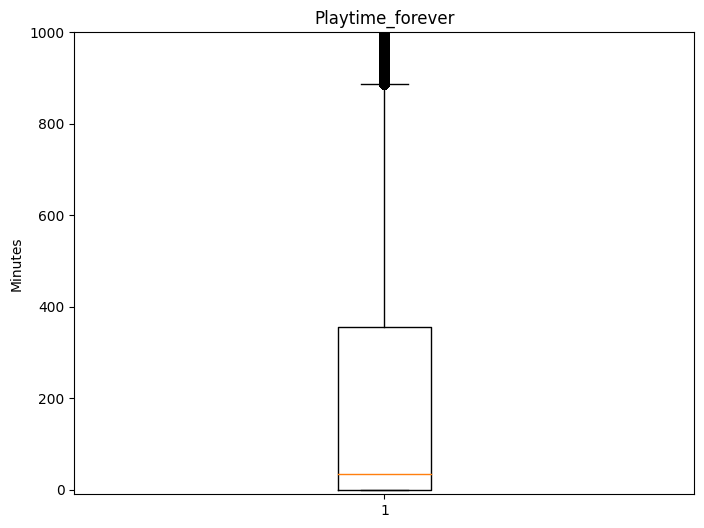

In [80]:
# Evaluating the column 'playtime_forever'

plt.figure(figsize=(8, 6))  # Optional plot size
plt.boxplot(dfPlayTime['playtime_forever'])
plt.title('Playtime_forever')  # Plot title
plt.ylim(-10, 1000)
plt.ylabel('Minutes')  # Y-axis label
plt.show()  # Display the plot

In [81]:
# I think we need to get more data about time, like average playing time per player or the max playing time in a day.
# then we will decide if we delete some data.
dfPlayTime['playtime_forever'].nlargest(3)

587715     642773
2499068    635295
4075729    632452
Name: playtime_forever, dtype: int64

In [82]:
# We save the dataframe as CSV file
#dfPlayTime.to_csv('datasets/play_time.csv', index=False)

In [ ]:
tamaño_parte = 2000000  # Número de filas por parte
num_partes = len(dfPlayTime) // tamaño_parte + 1

# Guardar las partes como archivos CSV separados
for i, chunk in enumerate(np.array_split(df, num_partes)):
    nombre_archivo = f'datasets/play_time_{i+1}.csv'
    chunk.to_csv(nombre_archivo, index=False)

print("Archivos CSV creados con éxito.")